## **Neural Networks Final Project**

<div class="alert alert-block alert-info">
<b>By:</b> 
<br/>Or Shahar – 206582017
<br/>Yuval Ben Shlomo – 312117666
</div>

---

**Table of contents:**</br></br>
&emsp;[חלק א](###-A)
</br></br>
&emsp;[חלק ב](###-B)
</br></br>
&emsp;[חלק ג](###-C)
</br></br>

---

### A

#### 2. Visualize the electric stimulation

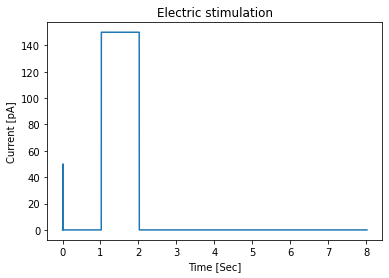

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data
Data = np.load('C:/Users/Home/Desktop/Final project/Data/neurodata.npy')
Stim = Data[0] # The electric stimulation

Fs = 50000 # [Hz]
t = np.arange(len(Stim)) / Fs # Time Axis [Sec]

# Plot
plt.plot(t, Stim)
plt.title('Electric stimulation')
plt.xlabel('Time [Sec]')
plt.ylabel('Current [pA]')
plt.show()

#### 3. Visualize the a/spiny neuron activity

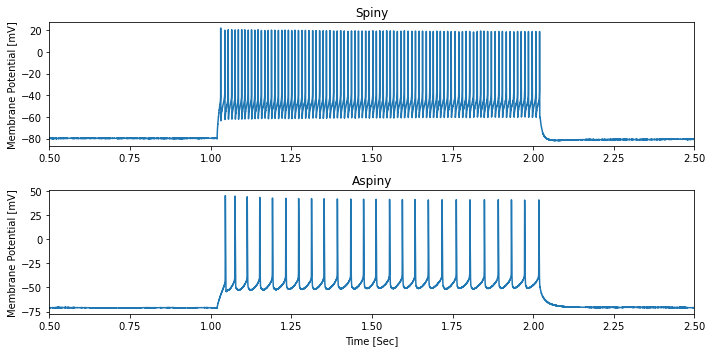

In [129]:
spiny = Data[1]
aspiny = Data[2]

plt.figure(figsize=(10, 5))

# Plot - spiny
plt.subplot(2, 1, 1)
plt.plot(t, spiny)
plt.title('Spiny')
plt.ylabel('Membrane Potential [mV]')
plt.xlim((0.5,2.5))

# Plot - aspiny
plt.subplot(2, 1, 2)
plt.plot(t, aspiny)
plt.title('Aspiny')
plt.ylabel('Membrane Potential [mV]')
plt.xlabel('Time [Sec]')
plt.xlim((0.5,2.5))

plt.tight_layout()
plt.show()

#### 4. Visualize the spike train

Determine the threshold value:

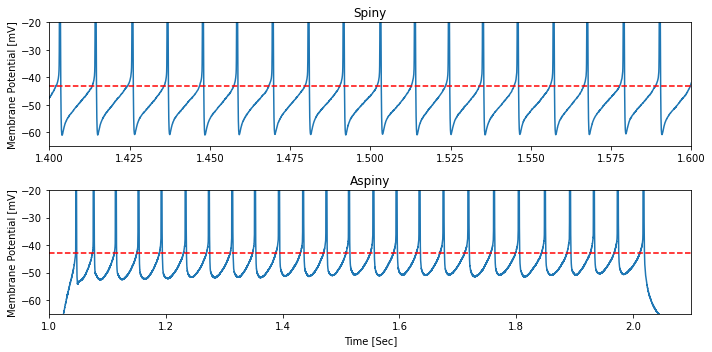

In [130]:
plt.figure(figsize=(10, 5))

# Plot - spiny
plt.subplot(2, 1, 1)
plt.plot(t, spiny)
plt.title('Spiny')
plt.ylabel('Membrane Potential [mV]')
plt.xlim((1.4,1.6))
plt.ylim((-65,-20))
plt.axhline(y = -43, color = 'r', linestyle = '--') 

# Plot - aspiny
plt.subplot(2, 1, 2)
plt.plot(t, aspiny)
plt.title('Aspiny')
plt.ylabel('Membrane Potential [mV]')
plt.xlabel('Time [Sec]')
plt.xlim((1,2.1))
plt.ylim((-65,-20))
plt.axhline(y = -43, color = 'r', linestyle = '--') 

plt.tight_layout()
plt.show()

Visualize the Spiny spike trains:

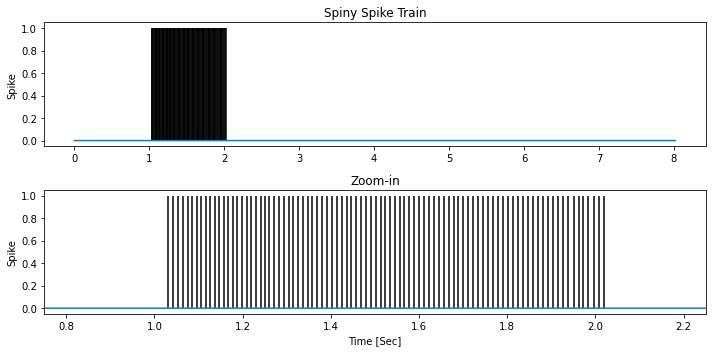

In [131]:
# Set threshold
threshold = -43 # [mV]

# Set "refractory period"
# (don't count another action potential if the membrane potential didn't came down under -50 mV)
ref_period = False

# Create spiny spike train
spiny_spikes = np.zeros_like(spiny)
for i in range(1, len(spiny)):
    if spiny[i] < -50:
        ref_period = False
    elif spiny[i] >= threshold and spiny[i-1] < threshold and ref_period == False:
        spiny_spikes[i] = 1
        ref_period = True

# Plot spike train
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t,np.zeros_like(t)) # Plot time axis
plt.vlines(t[spiny_spikes == 1], ymin=0, ymax=1, color='black') # Plot spikes
plt.title('Spiny Spike Train')
plt.ylabel('Spike')
# Zoom in
plt.subplot(2, 1, 2)
plt.plot(t,np.zeros_like(t)) # Plot time axis
plt.vlines(t[spiny_spikes == 1], ymin=0, ymax=1, color='black') # Plot spikes
plt.title('Zoom-in')
plt.xlabel('Time [Sec]')
plt.ylabel('Spike')
plt.xlim((0.75,2.25))

plt.tight_layout()
plt.show()

Visualize the Aspiny spike trains:

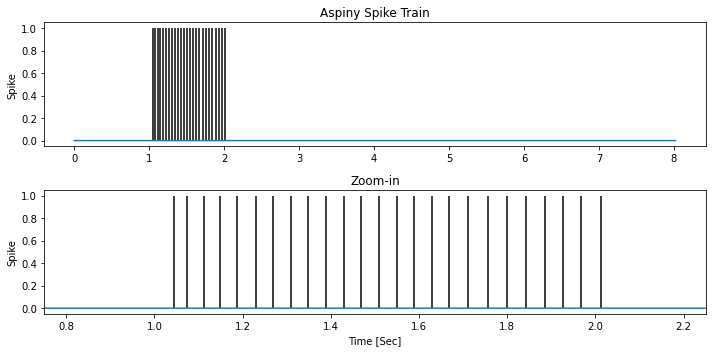

In [132]:
# Set threshold
threshold = -43 # [mV]

# Set "refractory period"
# (don't count another action potential if the membrane potential didn't came down under -50 mV)
ref_period = False

# Create aspiny spike train
aspiny_spikes = np.zeros_like(aspiny)
for i in range(1, len(aspiny)):
    if aspiny[i] < -50:
        ref_period = False
    elif aspiny[i] >= threshold and aspiny[i-1] < threshold and ref_period == False:
        aspiny_spikes[i] = 1
        ref_period = True

# Plot spike train
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t,np.zeros_like(t)) # Plot time axis
plt.vlines(t[aspiny_spikes == 1], ymin=0, ymax=1, color='black') # Plot spikes
plt.title('Aspiny Spike Train')
plt.ylabel('Spike')
# Zoom in
plt.subplot(2, 1, 2)
plt.plot(t,np.zeros_like(t)) # Plot time axis
plt.vlines(t[aspiny_spikes == 1], ymin=0, ymax=1, color='black') # Plot spikes
plt.title('Zoom-in')
plt.xlabel('Time [Sec]')
plt.ylabel('Spike')
plt.xlim((0.75,2.25))

plt.tight_layout()
plt.show()

#### 5. Time dependent firing rate

Binning and counting:

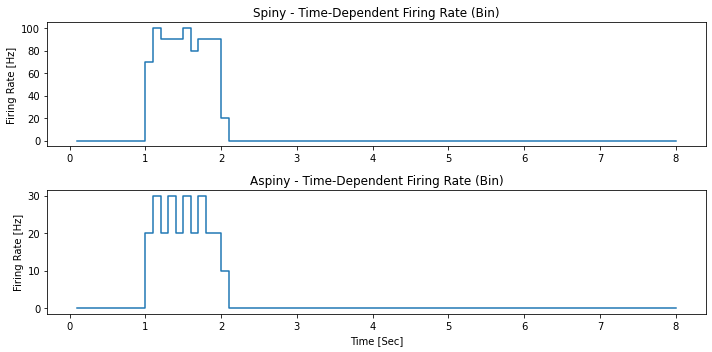

In [133]:
# Set bin size
bin_size = 0.1  # = 100 [ms]

# Divide time into bins
time_bins = np.arange(0, len(spiny_spikes) / Fs, bin_size) 

# Count the spikes inside the bins
bin_counts_spiny = np.histogram(t[spiny_spikes == 1], bins=time_bins)[0]
bin_counts_aspiny = np.histogram(t[aspiny_spikes == 1], bins=time_bins)[0]

# Plot - spiny
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.step(time_bins[1:], bin_counts_spiny / bin_size) # Convert to Hz [spikes/sec]
plt.title('Spiny - Time-Dependent Firing Rate (Bin)')
plt.ylabel('Firing Rate [Hz]')

# Plot - Aspiny
plt.subplot(2, 1, 2)
plt.step(time_bins[1:], bin_counts_aspiny / bin_size) # Convert to Hz [spikes/sec]
plt.title('Aspiny - Time-Dependent Firing Rate (Bin)')
plt.xlabel('Time [Sec]')
plt.ylabel('Firing Rate [Hz]')

plt.tight_layout()
plt.show()

Gaussian Kernal:

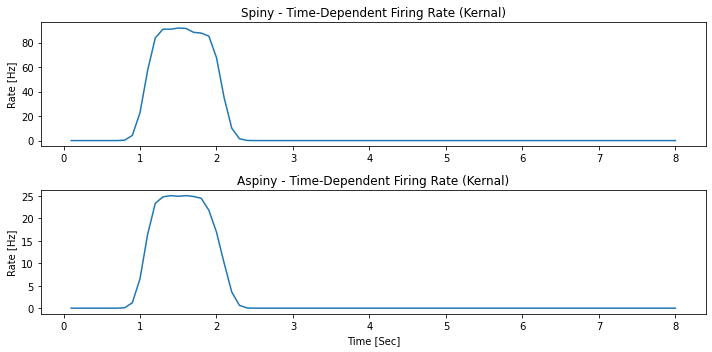

In [134]:
from scipy.ndimage import gaussian_filter1d

# Set bin size
bin_size = 0.1  # = 100 [ms]

# Sliding the Gaussian kernal
sigma = 1 # the width of the Gaussian curve
smoothed_rate_spiny = gaussian_filter1d(bin_counts_spiny / bin_size, sigma)
smoothed_rate_aspiny = gaussian_filter1d(bin_counts_aspiny / bin_size, sigma)

# Plot - spiny
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time_bins[1:], smoothed_rate_spiny)
plt.title('Spiny - Time-Dependent Firing Rate (Kernal)')
plt.ylabel('Rate [Hz]')

# Plot - Aspiny
plt.subplot(2, 1, 2)
plt.plot(time_bins[1:], smoothed_rate_aspiny)
plt.title('Aspiny - Time-Dependent Firing Rate (Kernal)')
plt.xlabel('Time [Sec]')
plt.ylabel('Rate [Hz]')

plt.tight_layout()
plt.show()

#### 6. Average firing rate and discriminability d'

Average firing rate:

In [135]:
total_time = len(spiny) / Fs # Time Axis [Sec]

# Calculate average Firing rate
avg_fr_spiny = np.sum(spiny_spikes) / total_time
avg_fr_aspiny = np.sum(aspiny_spikes) / total_time

print(f"Average Firing Rate - Spiny: {avg_fr_spiny:.2f} [Hz]")
print(f"Average Firing Rate - Aspiny: {avg_fr_aspiny:.2f} [Hz]")

Average Firing Rate - Spiny: 11.35 [Hz]
Average Firing Rate - Aspiny: 3.12 [Hz]


Display the Gaussian distributions:

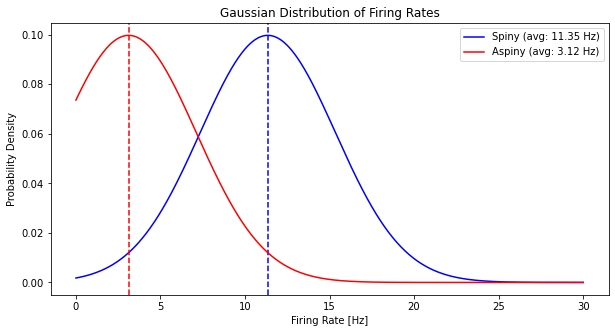

In [136]:
from scipy.stats import norm

# Choose standart deviation (= width of curve)
sigma_r = 4  # [Hz]

# Create the Gaussian distributions
x_values = np.linspace(0, 30, 1000)
gaussian_spiny = norm.pdf(x_values, avg_fr_spiny, sigma_r)
gaussian_aspiny = norm.pdf(x_values, avg_fr_aspiny, sigma_r)

# Plot distributions
plt.figure(figsize=(10, 5))
plt.plot(x_values, gaussian_spiny, label=f'Spiny (avg: {avg_fr_spiny:.2f} Hz)', color='b')
plt.axvline(x = avg_fr_spiny, color = 'b', linestyle = '--')
plt.plot(x_values, gaussian_aspiny, label=f'Aspiny (avg: {avg_fr_aspiny:.2f} Hz)', color='r')
plt.axvline(x = avg_fr_aspiny, color = 'r', linestyle = '--')

plt.title('Gaussian Distribution of Firing Rates')
plt.xlabel('Firing Rate [Hz]')
plt.ylabel('Probability Density')

plt.legend()
plt.show()

#### 7. Accuracy estimation

Choose Z:

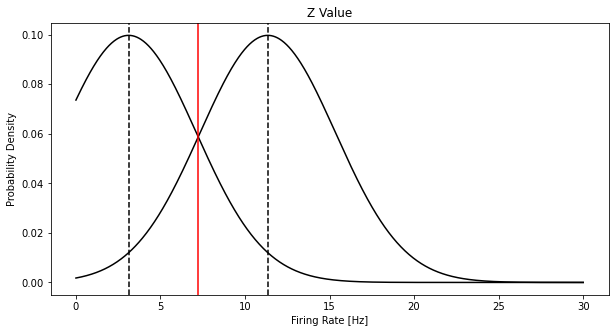

Z = 7.23 [Hz]


In [137]:
# Choose Z to be the cross point between the distributions
Z = (avg_fr_spiny + avg_fr_aspiny)/2

# Plot distributions
plt.figure(figsize=(10, 5))
plt.plot(x_values, gaussian_spiny, color='black')
plt.axvline(x = avg_fr_spiny, color = 'black', linestyle = '--')
plt.plot(x_values, gaussian_aspiny, color='black')
plt.axvline(x = avg_fr_aspiny, color = 'black', linestyle = '--')

# Plot Z line
plt.axvline(x = Z, color = 'red', linestyle = '-')

plt.title('Z Value')
plt.xlabel('Firing Rate [Hz]')
plt.ylabel('Probability Density')

plt.show()

print(f"Z = {Z:.2f} [Hz]")

Calculate the Confusion matrix:

In [138]:
from scipy.stats import norm

# Probability X > 0
greater_than_0_spiny = 1 - norm.cdf(0, avg_fr_spiny, sigma_r)
greater_than_0_aspiny = 1 - norm.cdf(0, avg_fr_aspiny, sigma_r)

# P(x > z | Spiny, X > 0):
TP = (1 - norm.cdf(Z, avg_fr_spiny, sigma_r)) / greater_than_0_spiny
# P(x > z | Aspiny, X > 0):
FP = (1 - norm.cdf(Z, avg_fr_aspiny, sigma_r)) / greater_than_0_aspiny
# P(0 < x <= z | Spiny):
FN = (norm.cdf(Z, avg_fr_spiny, sigma_r) - norm.cdf(0, avg_fr_spiny, sigma_r)) / greater_than_0_spiny
# P(0 < x <= z | Aspiny):
TN = (norm.cdf(Z, avg_fr_aspiny, sigma_r) - norm.cdf(0, avg_fr_aspiny, sigma_r)) / greater_than_0_aspiny

cm = np.array([[TP,FN],
               [FP,TN]])
print("Confusion Matrix:")
print(f'{cm}\n')

# Calculate properties 
accuracy = (TP + TN) / (TP + FP + FN + TN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Confusion Matrix:
[[0.85012235 0.14987765]
 [0.19411281 0.80588719]]

Accuracy: 0.83
Recall: 0.85
Precision: 0.81


#### 8. ROC & AUC

Calculate the ROC:

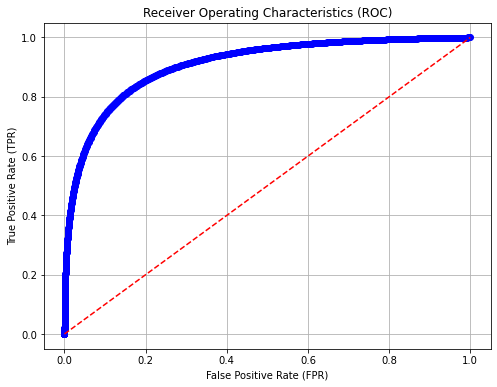

In [156]:
# Create the Gaussian distributions
firing_rates = np.linspace(0, 30, 1000)
gaussian_spiny = norm.pdf(firing_rates, avg_fr_spiny, sigma_r)
gaussian_aspiny = norm.pdf(firing_rates, avg_fr_aspiny, sigma_r)

# TPR/FPR list for each Firing Rate value
tpr_list = []
fpr_list = []

# Calculate TPR/FPR
for z in range(len(firing_rates)):
    # TPR - The proportion of actual positives (1) correctly identified. (1)
    TP = sum(gaussian_spiny[z:]) # Correct prediction
    FN = sum(gaussian_spiny[:z]) # Incorrect prediction
    TPR = TP / (TP + FN)
    
    # FPR - The proportion of actual negatives (0) incorrectly identified as positives. (1)
    FP = sum(gaussian_aspiny[z:]) # Incorrect prediction
    TN = sum(gaussian_aspiny[:z]) # Correct prediction
    FPR = FP / (FP + TN)
    
    # Save values for each z value
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, marker='o', color='b')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier 50/50
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristics (ROC)')
plt.grid(True)
plt.show()

Calculate the AUC:

In [157]:
from sklearn.metrics import auc

roc_auc = auc(fpr_list, tpr_list)

print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.9092061513544283


[Back up ↑](###-##-**Neural-Networks-Final-project**)

--- 
### B

#### 1. Principal Component Analysis (PCA)

Load the data

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the data
feat_data = pd.read_csv('C:/Users/Home/Desktop/Final project/Data/feat_data.csv')

# Extract the features without the neuron labels column
features = feat_data.drop(columns=['dendrite_type'])

Scale the data:

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

Perform the PCA: </br>
(calculate the covariance matrix, eigenvalues and eigenvectors)

In [29]:
# 3 components PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Save the data
pca_data = pd.DataFrame(data={'PCA1': pca_result[:, 0], 'PCA2': pca_result[:, 1], 'PCA3': pca_result[:, 2]})

# Convert neuron type to color
pca_data['dendrite_type'] = feat_data['dendrite_type'] # get the original neuron labels
pca_data['dendrite_type_color'] = pca_data['dendrite_type'].map({'spiny': 0, 'aspiny': 1})


א. </br>
3D Scatter Plot:

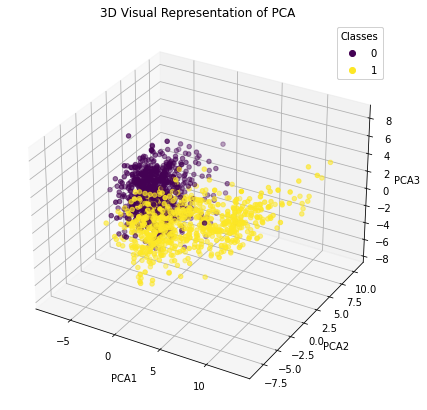

In [43]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data['PCA1'], pca_data['PCA2'], pca_data['PCA3'], c=pca_data['dendrite_type_color'])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('3D Visual Representation of PCA')

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

ג. </br>
2D graphs:

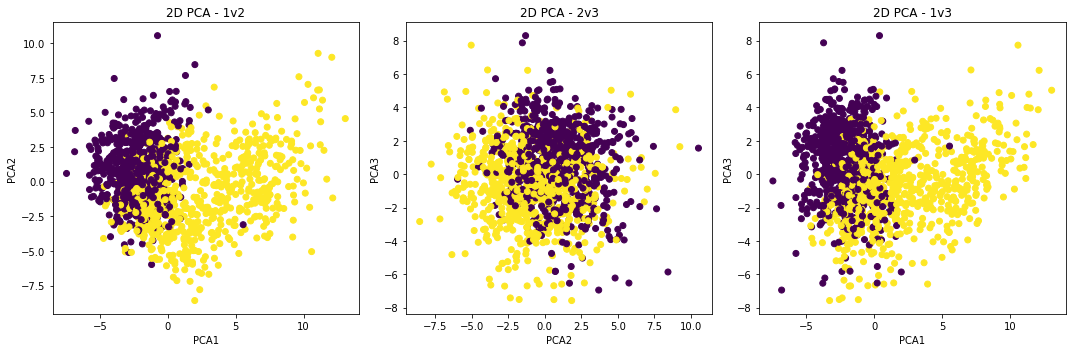

In [202]:
plt.figure(figsize=(15, 5))

# Plot PCA1 vs. PCA2
plt.subplot(1,3,1)
plt.scatter(pca_data['PCA1'], pca_data['PCA2'], c=pca_data['dendrite_type_color'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2D PCA - 1v2')

# Plot PCA2 vs. PCA3
plt.subplot(1,3,2)
plt.scatter(pca_data['PCA2'], pca_data['PCA3'], c=pca_data['dendrite_type_color'], cmap='viridis')
plt.xlabel('PCA2')
plt.ylabel('PCA3')
plt.title('2D PCA - 2v3')

# Plot PCA1 vs. PCA3
plt.subplot(1,3,3)
plt.scatter(pca_data['PCA1'], pca_data['PCA3'], c=pca_data['dendrite_type_color'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.title('2D PCA - 1v3')

plt.tight_layout()
plt.show()

ד. </br>
Mean squared error (MSE):

Number of components needed for less than 1% error: 27


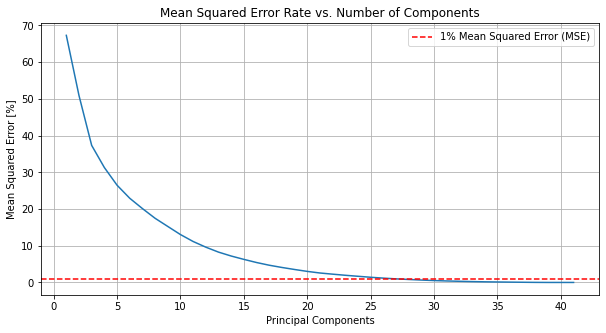

In [34]:
# Perform PCA on all the components (default)
pca_error = PCA()
pca_error.fit(scaled_data)

# Calculate the cumulative variance for each number of components
explained_variance_ratio = np.cumsum(pca_error.explained_variance_ratio_)

# Calculate the remaining error
MSE = 1 - explained_variance_ratio

# Find the number of components needed to get to 1% error / 99% reconstruction
components_needed = np.argmax(MSE < 0.01) + 1  # index starts from 0 so +1 

print(f"Number of components needed for less than 1% error: {components_needed}")

# Error graph
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), MSE * 100)
plt.axhline(y=1, color='r', linestyle='--', label='1% Mean Squared Error (MSE)')
plt.xlabel('Principal Components')
plt.ylabel('Mean Squared Error [%]')
plt.title('Mean Squared Error Rate vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()

#### 2. Auto-Encoder

Build the Autoencoder:

In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# Input: 
input_dim = scaled_data.shape[1] # = 41
input_layer = Input(shape=(input_dim,))

# Hidden layers:
# Layer 1 (Encoder)
encoded = Dense(32, activation='tanh')(input_layer) 
# Layer 2 (Bottleneck)
bottleneck = Dense(3, activation='tanh')(encoded)
# Layer 3 (Decoder)
decoded = Dense(32, activation='tanh')(bottleneck)

# Output:
output_layer = Dense(input_dim, activation='linear')(decoded)

# Set the model and compile
autoencoder = Model(input_layer, output_layer) # 41 -> 32 -> 3 -> 32 -> 41
autoencoder.compile(optimizer=Adam(), loss='mse') # Adam optimizer and MSE Loss


Train the network:

In [58]:
history = autoencoder.fit(scaled_data, scaled_data, epochs=70, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 1.0675 - val_loss: 1.0214
Epoch 2/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0257 - val_loss: 0.9846
Epoch 3/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9990 - val_loss: 0.9490
Epoch 4/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9637 - val_loss: 0.9143
Epoch 5/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9270 - val_loss: 0.8805
Epoch 6/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8764 - val_loss: 0.8474
Epoch 7/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8574 - val_loss: 0.8150
Epoch 8/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8199 - val_loss: 0.7839
Epoch 9/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7971 - val_loss: 0.7546
Epoch 10/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7663 - val_loss: 0.7275
Epoch 11/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7409 - val_loss: 0.7027
Epoch 12/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7095 - val_loss: 0.6801
E

a) Error along the training

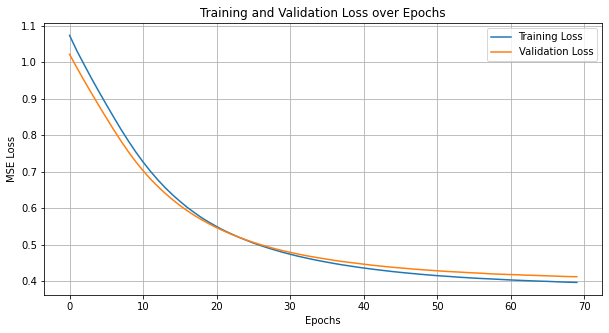

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

b) Bottleneck 3D scatter plot

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


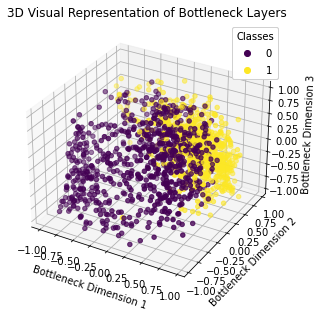

In [60]:
encoded_data = Model(inputs=input_layer, outputs=bottleneck).predict(scaled_data)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2],
                     c=feat_data['dendrite_type'].astype('category').cat.codes)
ax.set_xlabel('Bottleneck Dimension 1')
ax.set_ylabel('Bottleneck Dimension 2')
ax.set_zlabel('Bottleneck Dimension 3')
plt.title('3D Visual Representation of Bottleneck Layers')

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.grid(True)
plt.show()

c) Autoencoder vs. PCA - Comparison: </br></br>
MSE Comparison:

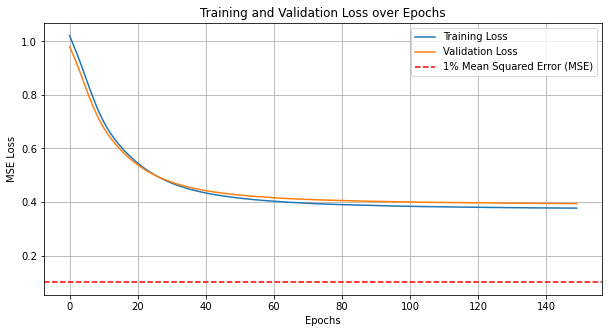

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=0.1, color='r', linestyle='--', label='1% Mean Squared Error (MSE)') # PCA MSE
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

2D Graphs Comparison:

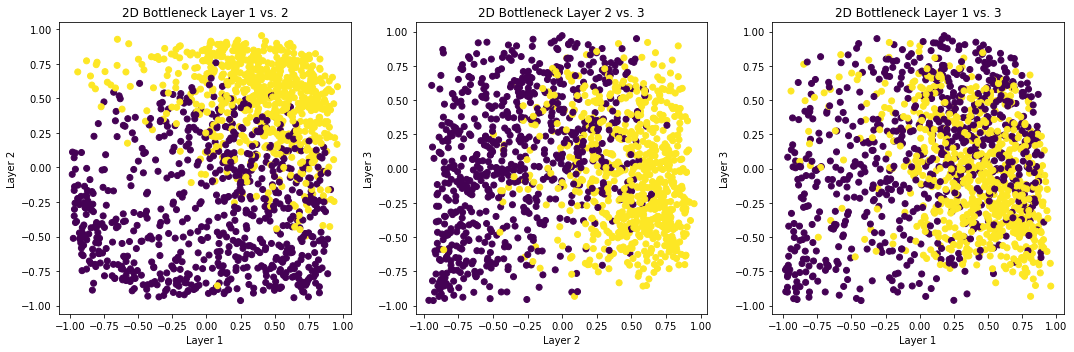

In [61]:
plt.figure(figsize=(15, 5))

# Plot Bottleneck Layer 1 vs. Layer 2
plt.subplot(1,3,1)
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=feat_data['dendrite_type'].astype('category').cat.codes)
plt.xlabel('Layer 1')
plt.ylabel('Layer 2')
plt.title('2D Bottleneck Layer 1 vs. 2')

# Plot Bottleneck Layer 2 vs. Layer 3
plt.subplot(1,3,2)
plt.scatter(encoded_data[:, 1], encoded_data[:, 2], c=feat_data['dendrite_type'].astype('category').cat.codes)
plt.xlabel('Layer 2')
plt.ylabel('Layer 3')
plt.title('2D Bottleneck Layer 2 vs. 3')

# Plot Bottleneck Layer 1 vs. Layer 3
plt.subplot(1,3,3)
plt.scatter(encoded_data[:, 0], encoded_data[:, 2], c=feat_data['dendrite_type'].astype('category').cat.codes)
plt.xlabel('Layer 1')
plt.ylabel('Layer 3')
plt.title('2D Bottleneck Layer 1 vs. 3')

plt.tight_layout()
plt.show()

[Back up ↑](###-##-**Neural-Networks-Final-project**)

--- 
### C

#### 1. Logistic Regression

Load the data:

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Load the data
feat_data = pd.read_csv('C:/Users/Home/Desktop/Final project/Data/feat_data.csv')

# Extract the features without the neuron labels column
features = feat_data.drop(columns=['dendrite_type'])
labels = feat_data['dendrite_type'].astype('category').cat.codes # Aspiny = 0, Spiny = 1

# Split Train/Test 80/20%
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

Scale the data:

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create the Logistic Regression model:

In [81]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

א) Calculate the statistic properties for the <b>test</b> set:

In [82]:
# Prediction based on the test set
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Calculate Confusion Matrix, Precision, Recall
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

print(f"Logistic Regression Confusion Matrix:\n{conf_matrix_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")

Logistic Regression Confusion Matrix:
[[148   1]
 [  1 135]]
Precision: 0.9926470588235294
Recall: 0.9926470588235294


#### 2. Perceptron

א) Create the Perceptron model:

In [75]:
from sklearn.linear_model import Perceptron

# Create the model
perceptron_model = Perceptron()
perceptron_model.fit(X_train_scaled, y_train)

Perceptron()

Calculate the statistic properties for the <b>TEST</b> set:

In [77]:
# Prediction based on the test set
y_pred_perceptron = perceptron_model.predict(X_test_scaled)

# Calculate Confusion Matrix, Precision, Recall
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)

print(f"Perceptron Confusion Matrix:\n{conf_matrix_perceptron}")
print(f"Precision: {precision_perceptron}")
print(f"Recall: {recall_perceptron}")

Perceptron Confusion Matrix:
[[148   1]
 [  8 128]]
Precision: 0.9922480620155039
Recall: 0.9411764705882353


ב) Check for overfitting </br>
Calculate the statistic properties for the <b>TRAIN</b> set:

In [78]:
# Prediction based on the train set
y_train_pred = perceptron_model.predict(X_train_scaled)

# Calculate Precision, Recall
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")

Training Precision: 0.9725776965265083
Training Recall: 0.9432624113475178


#### 3. Multi Layered Perceptron (MLP)

Create the model:

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Createe the model
mlp_model = Sequential()

# Hidden Layer 1: (Input)
input_dim = X_train_scaled.shape[1] # = 41
mlp_model.add(Input(shape=(input_dim,)))

# Hidden Layer 2:
mlp_model.add(Dense(32, activation='tanh'))

# Output Layer: (Binary Output)
mlp_model.add(Dense(1, activation='sigmoid'))

# Compile model with Gradient Descent (Adam)
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

4. Gradient Descent (GD) Train:

In [120]:
# Train the model (10% Validation set)
history_gd = mlp_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5986 - loss: 0.6945 - val_accuracy: 0.8772 - val_loss: 0.3323
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8894 - loss: 0.3106 - val_accuracy: 0.9123 - val_loss: 0.2598
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9077 - loss: 0.2442 - val_accuracy: 0.9298 - val_loss: 0.2345
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9459 - loss: 0.1979 - val_accuracy: 0.9474 - val_loss: 0.2193
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9308 - loss: 0.1978 - val_accuracy: 0.9474 - val_loss: 0.2075
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9436 - loss: 0.1708 - val_accuracy: 0.9474 - val_loss: 0.1980
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9517 - loss: 0.1588 - val_accuracy: 0.9474 - val_loss: 0.1942
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9631 - loss: 0.1293 - val_accuracy: 0.9474 - val_loss

Plot Training/Validation Loss:

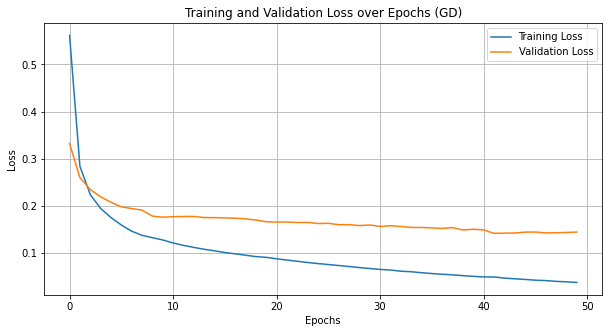

In [121]:
plt.figure(figsize=(10, 5))
plt.plot(history_gd.history['loss'], label='Training Loss')
plt.plot(history_gd.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs (GD)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

א) Calculate the statistic properties for the <b>test</b> set:

In [122]:
# Prediction based on the test set
y_pred_mlp_gd = (mlp_model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate Confusion Matrix, Precision, Recall
conf_matrix_gd = confusion_matrix(y_test, y_pred_mlp_gd)
precision_gd = precision_score(y_test, y_pred_mlp_gd)
recall_gd = recall_score(y_test, y_pred_mlp_gd)

print(f"MLP with GD Confusion Matrix:\n{conf_matrix_gd}")
print(f"Precision: {precision_gd}")
print(f"Recall: {recall_gd}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
MLP with GD Confusion Matrix:
[[149   0]
 [  1 135]]
Precision: 1.0
Recall: 0.9926470588235294


ב) Stochastic Gradient Descent (SGD) - Batch size: 10 </br></br>
Create the model:

In [123]:
# Createe the model
mlp_model_sgd = Sequential()
input_dim = X_train_scaled.shape[1] # = 41

# Hidden Layer 1: (Input)
mlp_model_sgd.add(Input(shape=(input_dim,)))

# Hidden Layer 2:
mlp_model_sgd.add(Dense(32, activation='tanh'))

# Output Layer: (Binary Output)
mlp_model_sgd.add(Dense(1, activation='sigmoid'))

# Compile model with Stochastic Gradient Descent (SGD)
mlp_model_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Train the model: (SGD w/ Batch size: 10)

In [124]:
history_sgd = mlp_model_sgd.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.1)

Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7059 - loss: 0.5626 - val_accuracy: 0.8947 - val_loss: 0.3015
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8991 - loss: 0.2861 - val_accuracy: 0.8860 - val_loss: 0.2502
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9141 - loss: 0.2335 - val_accuracy: 0.9035 - val_loss: 0.2277
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9226 - loss: 0.2193 - val_accuracy: 0.9298 - val_loss: 0.2144
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9359 - loss: 0.1903 - val_accuracy: 0.9386 - val_loss: 0.2054
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9390 - loss: 0.1704 - val_accuracy: 0.9386 - val_loss: 0.1990
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9473 - loss: 0.1452 - val_accuracy: 0.9474 - val_loss: 0.1944
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9552 - loss: 0.1389 - val_accuracy: 0.

Plot Training/Validation Loss

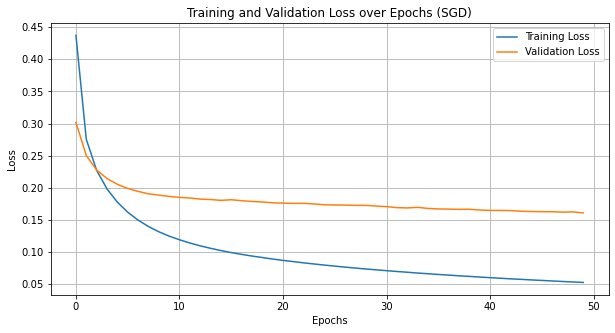

In [125]:
plt.figure(figsize=(10, 5))
plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs (SGD)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Calculate the statistic properties for the <b>test</b> set:

In [126]:
# Prediction based on the test set
y_pred_mlp_sgd = (mlp_model_sgd.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate Confusion Matrix, Precision, Recall
conf_matrix_sgd = confusion_matrix(y_test, y_pred_mlp_sgd)
precision_sgd = precision_score(y_test, y_pred_mlp_sgd)
recall_sgd = recall_score(y_test, y_pred_mlp_sgd)

print(f"MLP with SGD Confusion Matrix:\n{conf_matrix_sgd}")
print(f"Precision: {precision_sgd}")
print(f"Recall: {recall_sgd}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MLP with SGD Confusion Matrix:
[[148   1]
 [  1 135]]
Precision: 0.9926470588235294
Recall: 0.9926470588235294


ג) Check for overfitting </br>
Calculate the statistic properties for the <b>TRAIN</b> set:

In [127]:
# Prediction based on the train set
y_train_pred_mlp_sgd = (mlp_model_sgd.predict(X_train_scaled) > 0.5).astype("int32")

# Calculate Precision, Recall
train_precision = precision_score(y_train, y_train_pred_mlp_sgd)
train_recall = recall_score(y_train, y_train_pred_mlp_sgd)

print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training Precision: 0.985663082437276
Training Recall: 0.975177304964539


---

[Back up ↑](###-##-**Neural-Networks-Final-project**)